In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
bike_data_raw=pd.read_csv("daily-bike-share.csv")

In [3]:
bike_data_raw.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [4]:
bike_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [5]:
bike_data_raw['dteday']=pd.to_datetime(bike_data_raw['dteday'])

In [6]:
display(bike_data_raw)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [7]:
print(bike_data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  rentals     731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 80.1 KB
None


In [8]:
bike_data_raw['rentals'].describe()

count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: rentals, dtype: float64

<Axes: xlabel='rentals', ylabel='Count'>

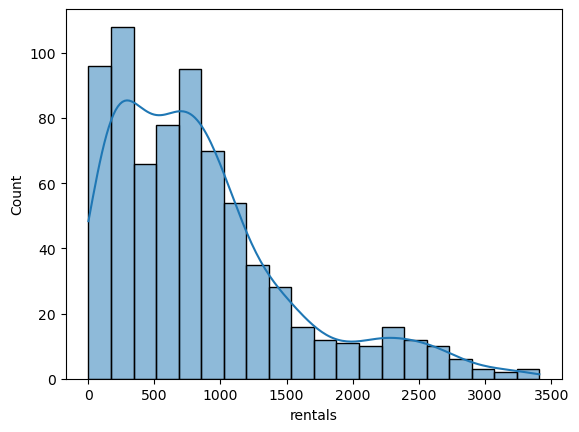

In [9]:
sns.histplot(bike_data_raw['rentals'],kde=True)

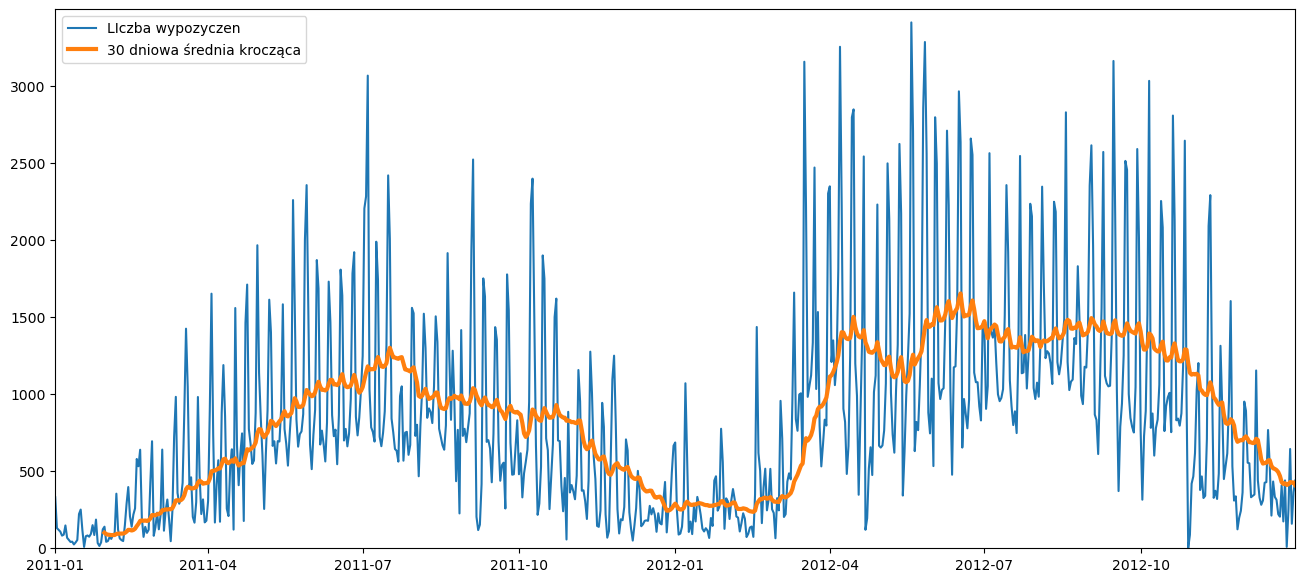

In [10]:
plt.figure(figsize=(16,7))
plt.plot(bike_data_raw['dteday'],bike_data_raw['rentals'],label='LIczba wypozyczen')
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'].rolling(30).mean(), linewidth=3.0, label='30 dniowa średnia krocząca')
plt.xlim([bike_data_raw['dteday'].min(),bike_data_raw['dteday'].max()])
plt.ylim([0, bike_data_raw['rentals'].max()*1.025])
plt.legend(loc='upper left')
plt.show()


In [11]:
print('Przed usunieciem')
display(bike_data_raw)
print('Po usunieciu')
bike_data=bike_data_raw.copy()
bike_data.drop(['instant','dteday','yr'],axis=1,inplace=True)
display(bike_data)

Przed usunieciem


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


Po usunieciu


,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [12]:
numeric_features=['temp','atemp','hum','windspeed']
categorical_features=['season','mnth','holiday','weekday','workingday','weathersit']
target='rentals'

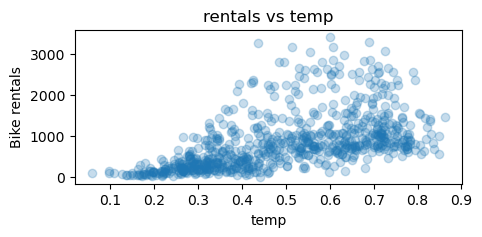

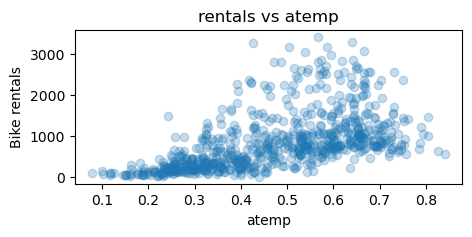

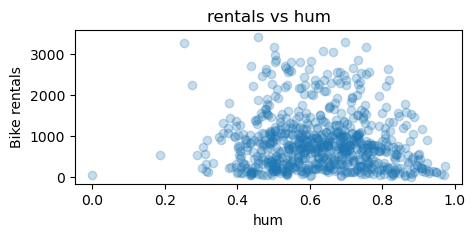

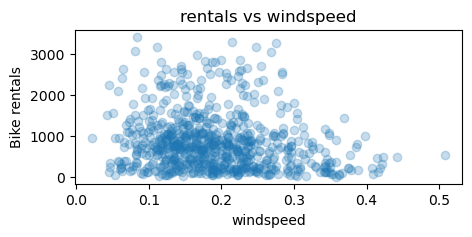

In [13]:
for numeric_feature in numeric_features:
    plt.figure(figsize=(5,2))
    plt.scatter(bike_data[numeric_feature],bike_data[target],alpha=0.25)
    plt.xlabel(numeric_feature)
    plt.ylabel('Bike rentals')
    plt.title(f'rentals vs {numeric_feature}')
    plt.show()
    

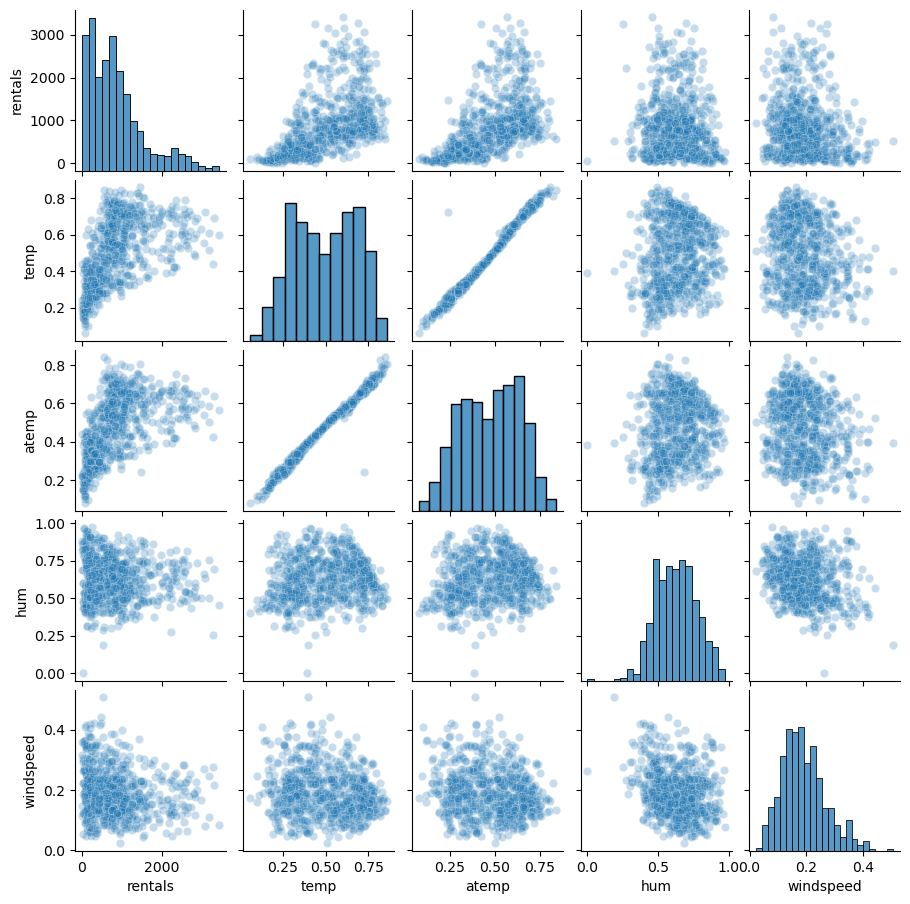

In [14]:
fig = sns.pairplot(bike_data[[target]+numeric_features], kind='scatter', plot_kws={'alpha': 0.25})
fig.fig.set_size_inches(9, 9) #ustawiamy rozmiar wykresu
plt.show()

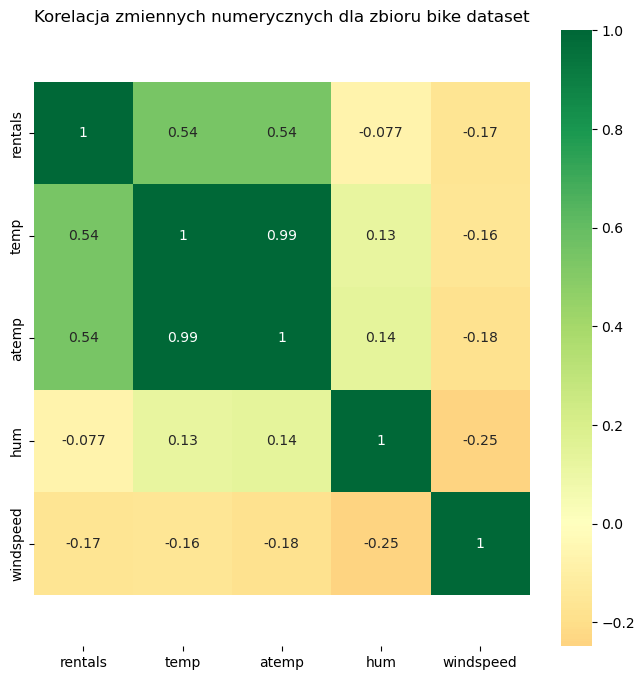

In [15]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(bike_data[[target]+numeric_features].corr(),
                 xticklabels=bike_data[[target]+numeric_features].corr().columns,
                 yticklabels=bike_data[[target]+numeric_features].corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja zmiennych numerycznych dla zbioru bike dataset', fontsize=12)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Wnioski te same, które wyciągnęliśmy wcześniej.

Liczba rowerzystów jest najbardziej zależna od temperatury.

Wilgotność oraz prędkość wiatru mają mniejszy wpływ niż temperatura, korelacja jest ponadto ujemna.

Temperatura oraz temperatura odczuwalna niosą tę samą informację.


Inżynieria cech została już wykonana na podstawie zmiennych związanych z datą. Co zatem możemy zrobić, jeśli mamy dwie zmienne skorelowane ze sobą. Z pomocą przychodzi nam PCA (Analiza głównych składowych), lecz ten algorytm poznasz na zajęciach z uczenia nienadzorowanego. Innym pomysłem jest po prostu usunięcie jednej z temperatur. W Data Science czasem wygrywa POMYSŁ i my z tego skorzystamy. Obliczmy różnicę pomiędzy temperaturą odczuwalną a temperaturą i wyskalujmy, korzystając z temperatury zgodnie z poniższym wzorem:



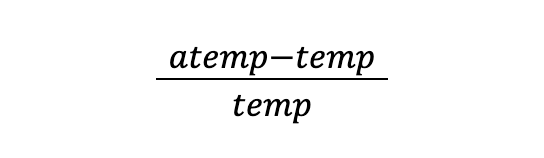

Stworzyliśmy nową zmienną difference_temp, możemy zatem usunąć temperaturę odczuwalną i policzyć korelację raz jeszcze, choć teraz jedynie pomiędzy naszą zmienną zależną, temperaturą i właśnie stworzoną nową zmienną. Pamiętaj, aby zaktualizować listę ze zmiennymi numerycznymi.

In [16]:
bike_data['difference_temp'] = (bike_data['atemp'] - bike_data['temp'])/bike_data['temp']
bike_data.drop(['atemp'], axis=1, inplace=True)
numeric_features = ['temp', 'difference_temp', 'hum', 'windspeed']
bike_data[['rentals', 'temp', 'difference_temp']].corr()

,rentals,temp,difference_temp
rentals,1.000000,0.543285,-0.310423
temp,0.543285,1.000000,-0.599254
difference_temp,-0.310423,-0.599254,1.000000


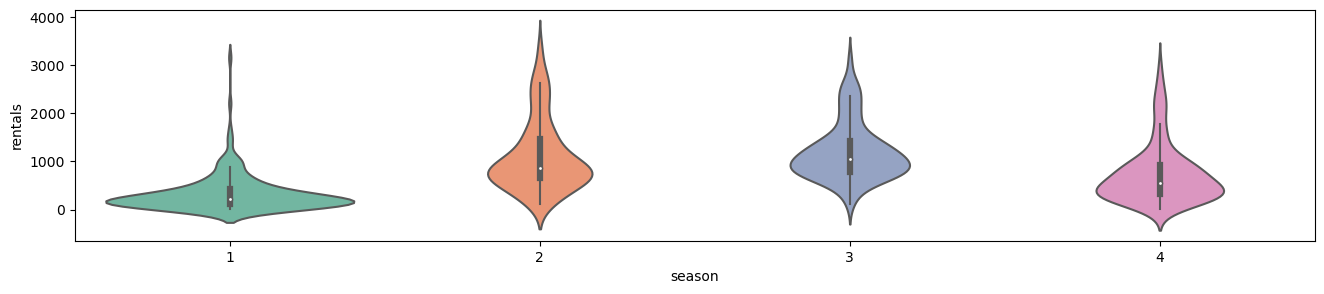

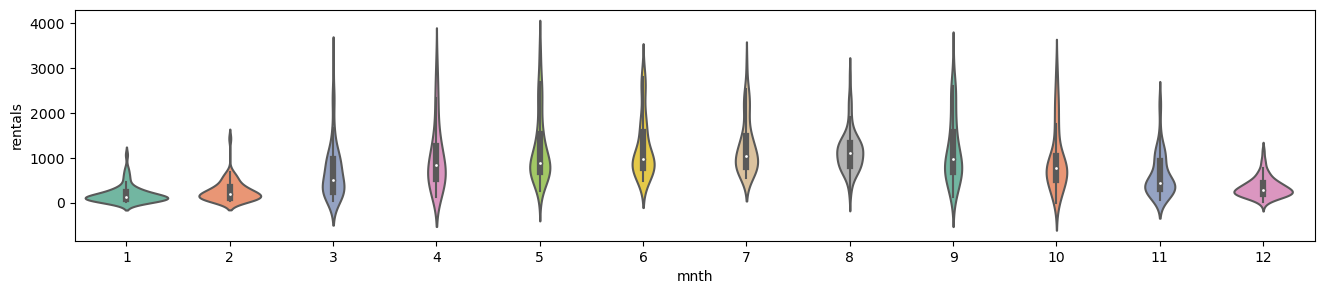

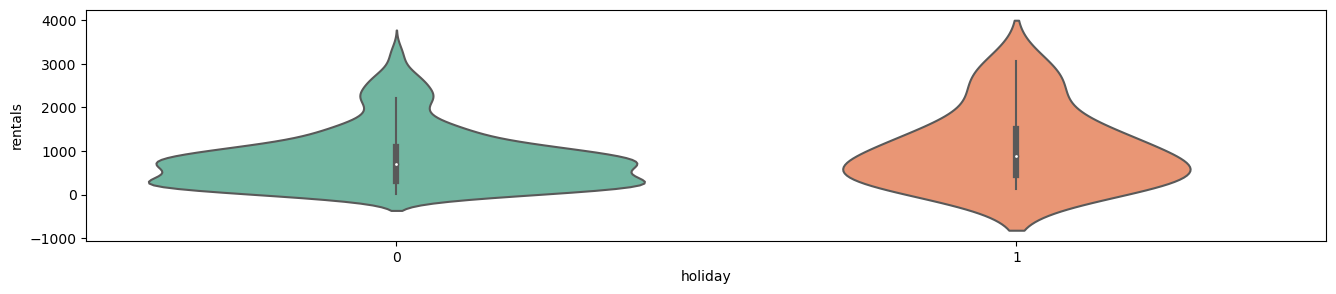

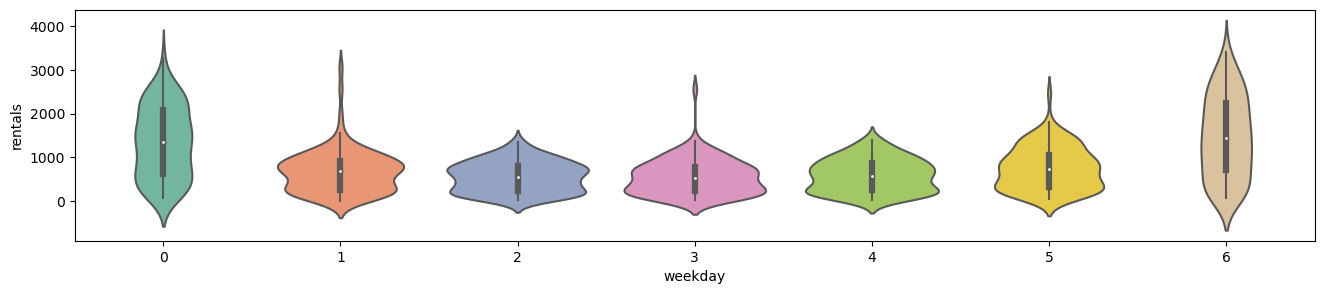

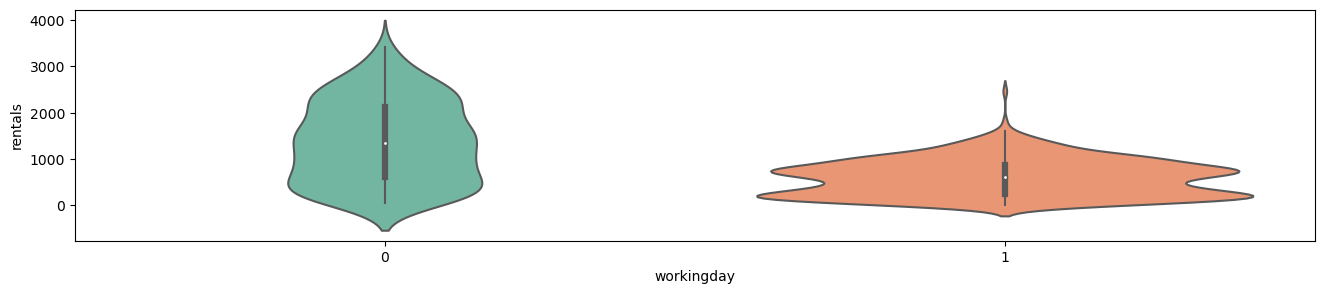

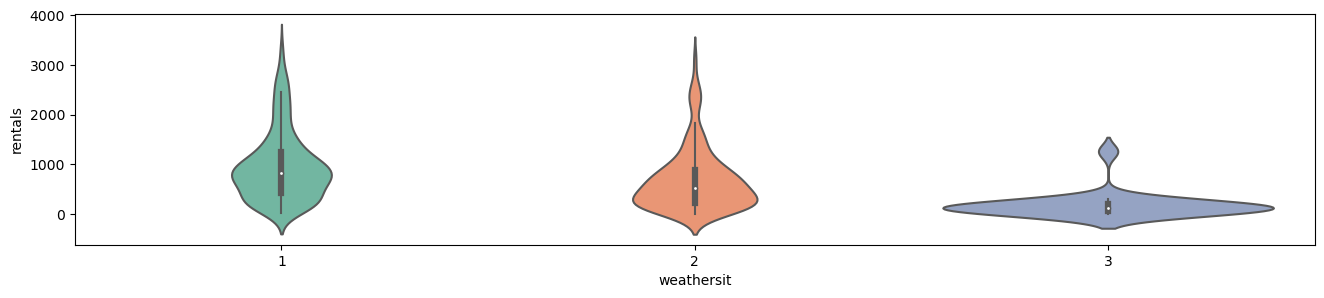

In [17]:
for categoric_features in categorical_features:
    plt.figure(figsize=(16, 3))
    sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], palette="Set2")
    plt.show()

Poznaliśmy problem do rozwiązania, zweryfikowaliśmy dane oraz udało nam się je przekształcić, choć to w dużej mierze zostało to już wykonane we wczytanym przez nas zbiorze. Czym jest regresja liniowa dowiedzieliśmy się już wcześniej, przejdźmy do praktycznej części i stwórzmy taki model. Musimy teraz określić, czym jest X, a czym y. W naszym przypadku - X to zmienna, na podstawie której dokonujemy predykcji, y - zmienna, którą chcemy prognozować.

In [18]:
print(f'Numeric features: {numeric_features}')
print(f'Categorical features: {categorical_features}')
print(f'Target: {target}')
display(bike_data)

Numeric features: ['temp', 'difference_temp', 'hum', 'windspeed']
Categorical features: ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
Target: rentals


,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,rentals,difference_temp
0,1,1,0,6,0,2,0.344167,0.805833,0.160446,331,0.056537
1,1,1,0,0,0,2,0.363478,0.696087,0.248539,131,-0.026794
2,1,1,0,1,1,1,0.196364,0.437273,0.248309,120,-0.035439
3,1,1,0,2,1,1,0.200000,0.590435,0.160296,108,0.060610
4,1,1,0,3,1,1,0.226957,0.436957,0.186900,82,0.010191
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,-0.108295
727,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,0.006762
728,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,-0.043157
729,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,-0.094331


In [19]:
X=bike_data[['temp']].copy()
y=bike_data[target].copy()
print('X:')
print(X.values[:3])
print('\ny')
print(y.values[:3])

X:
[[0.344167]
 [0.363478]
 [0.196364]]

y
[331 131 120]


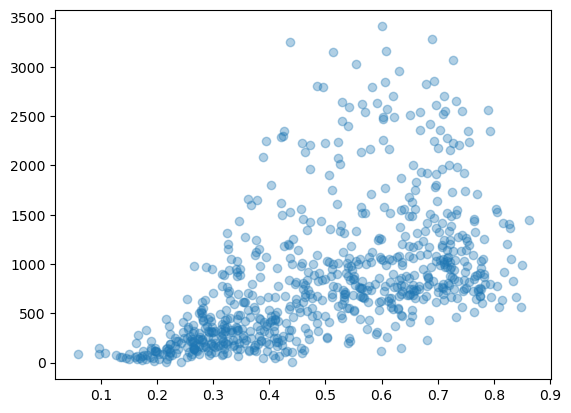

In [20]:
plt.scatter(X,y,alpha=0.35)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

In [22]:
print(f'X.shape: {X.shape}, y.shape {y.shape}')
print()
print(f'X_train.shape: {X_train.shape}, y_train.shape {y_train.shape}')
print(f'X_test.shape: {X_test.shape}, y_test.shape {y_test.shape}')

X.shape: (731, 1), y.shape (731,)

X_train.shape: (584, 1), y_train.shape (584,)
X_test.shape: (147, 1), y_test.shape (147,)


In [23]:

from sklearn.linear_model import LinearRegression

In [24]:
lr_model=LinearRegression()

In [25]:


lr_model.fit(X_train,y_train)

LinearRegression()

In [26]:
print(lr_model.intercept_)
print(lr_model.coef_)

-179.96286312537347
[1990.31869846]


In [27]:
import numpy as np

In [28]:
X_linspace=np.linspace(0,1,100)
y_fitted=lr_model.coef_*X_linspace+lr_model.intercept_

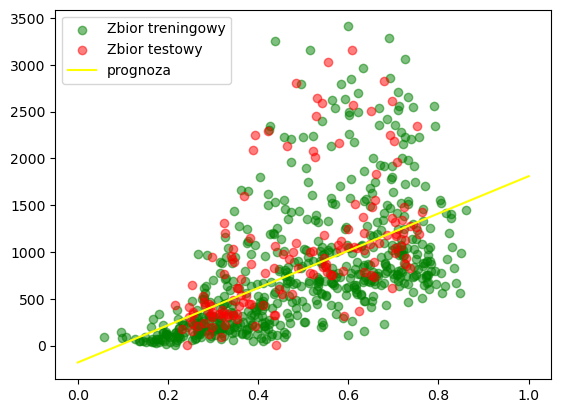

In [29]:
plt.scatter(X_train,y_train,color='green',alpha=0.5,label="Zbior treningowy")
plt.scatter(X_test,y_test,color='red',alpha=0.5,label='Zbior testowy')
plt.plot(X_linspace,y_fitted,color='yellow',label='prognoza')
plt.legend(loc='upper left')
plt.show()

In [30]:
X_new=[[0.3],[0.7]]
predicted_data=lr_model.predict(X_new)
print(predicted_data.round())

[ 417. 1213.]


In [31]:
y_predict_train=lr_model.predict(X_train)
y_predict_test=lr_model.predict(X_test)

In [32]:
print('Predykcja:')
print(np.round(y_predict_test[:5]).astype(int))
print('Wartość prawdziwa:')
print(y_test.values[:5])

Predykcja:
[1285 1313 1324 1245 1198]
Wartość prawdziwa:
[1278 1263 1196 1065 2247]


In [33]:
bike_data['difference_temp']

0      0.056537
1     -0.026794
2     -0.035439
3      0.060610
4      0.010191
         ...   
726   -0.108295
727    0.006762
728   -0.043157
729   -0.094331
730    0.035463
Name: difference_temp, Length: 731, dtype: float64

# Współczynnik determinacji


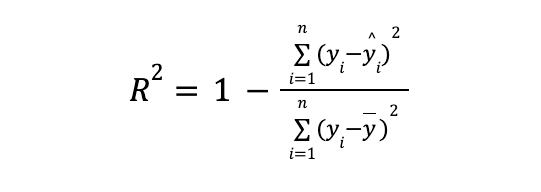

yi – wartości prawdziwe,

ŷi – wartości prognozy,

ȳ – średnia z zaobserwowanych obserwacji.

Dla regresji liniowej współczynnik korelacji to podniesiony do drugiej potęgi współczynnik korelacji. Wartości R2 zbliżone do 1, odpowiadają dobremu dopasowaniu modelu, zaś wartości bliskie 0 oznacza niezadowalające dopasowanie. Jak możesz zauważyć we wzorze, w liczniku jest suma kwadratów różnic pomiędzy wartością prawdziwą a prognozą, a w mianowniku pomiędzy wartością prawdziwą a resztą. W związku z powyższym współczynnik determinacji pokazuje o ile lepiej nasz model sobie radzi niż średnia. Innymi słowy, pokazuje jaka część y jest wyjaśniana przez model.

Praktycznie możemy obliczyć R2 dla zbioru testowego, lecz z punktu widzenia Data Science - nie powinniśmy tego robić, ponieważ R2 przekazuje nam informację o ile lepiej nasz model wyjaśnia zmienność niż średnia. Stąd też R2 dla modelu, który jest średnią, daje wynik 0. Ponieważ z założenia nie znamy średniej ze zbioru testowego, to również nie powinniśmy dla tego zbioru liczyć R2.

Sprawdźmy, jaką część zmienności y wyjaśnia nasz model.


In [34]:

from sklearn.metrics import r2_score
print(f'Train R^2: {r2_score(y_train, y_predict_train)}')


Train R^2: 0.30617863454631333


# MAE - Mean Absolute Error
Jest to średni błąd absolutny.


Łatwa metryka do zrozumienia, jednak nie karze dużych błędów oraz nie pokazuje, w którą stronę model się myli. Z biznesowej perspektywy niedoszacowanie może być droższe niż przeszacowanie. Wyobraźmy sobie, że prognozujesz popyt. Z jednej strony błąd to utracony zysk (wyprodukowaliśmy mniej niż realny popyt), zaś z innej to magazynowanie (sprzedaliśmy mniej niż było na półkach). Który błąd wybierasz?

Gdy rozwiązujesz problem biznesowy oraz oceniasz model, musisz mieć w pamięci zalety i wady poszczególnych metryk.

Policzmy MAE na zbiorze treningowym oraz testowym.

In [35]:
from sklearn.metrics import mean_absolute_error
print(f'Train MAE: {mean_absolute_error(y_train, y_predict_train)}')
print(f'Test MAE: {mean_absolute_error(y_test, y_predict_test)}')

Train MAE: 404.83395997526156
Test MAE: 391.02879410802956


# MAPE - Mean Absolute Percentage Error

Metryka liczy średni błąd procentowy. Różnica w porównaniu do poprzedniej metryki jest taka, że różnicę dzielimy przez wartość prawdziwą. Polubisz tą metrykę, biznes lubi gdy rozmawia się o procentach.

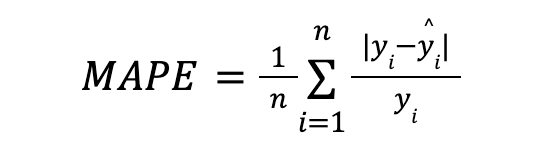



In [36]:
from sklearn.metrics import mean_absolute_percentage_error
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, y_predict_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, y_predict_test)}')

Train MAPE: 0.9668581511778541
Test MAPE: 2.986492531856051


Średnio mylimy się prawie o 300%. Lepiej prognozujemy niż średnia, jednak chyba uznasz, że jeszcze nie jest dobrze.

# MSE - Mean Squared Error

Średni błąd kwadratowy. Istotne dla tej metryki jest, że błędy podnoszone są do drugiej potęgi. Z tego powodu ta metryka jest wrażliwa na wysokie błędy, a to jest jej przewaga nad MAE. Wadą jest, że wartości nie są dla nas zrozumiałe. Przez to, że błędy podnoszone są do kwadratu, to nie są wyrażane w procentach czy w wartościach wypożyczonych rowerów.

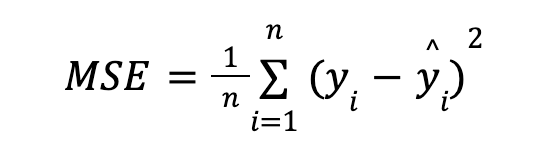

In [37]:
from sklearn.metrics import mean_squared_error
print(f'Train MSE: {mean_squared_error(y_train, y_predict_train)}')
print(f'Test MSE: {mean_squared_error(y_test, y_predict_test)}')

Train MSE: 317745.9412425235
Test MSE: 397066.9447179113


Jak rozumieć powyższe wartości? Właśnie, jest to wada powyższej metryki, którą następna metryka niweluje.

# RMSE – Root Mean Squared Error

Pierwiastek błędu średniokwadratowego. Dzięki temu, że wyliczamy metrykę z MSE, otrzymujemy nową metrykę, porównywalną do MAE. RMSE nie może być mniejsze niż MAE, a różnica pomiędzy nimi świadczy o skali dużych błędów. Załóżmy, że dla pewnego zbioru błąd absolutny jest ten sam, wtedy też metryka RMSE będzie równa MAE.

In [38]:
from math import sqrt
print(f'Train RMSE: {sqrt(mean_squared_error(y_train, y_predict_train))}')
print(f'Test RMSE: {sqrt(mean_squared_error(y_test, y_predict_test))}')

Train RMSE: 563.6895787953894
Test RMSE: 630.1324818781454


# Wizualizacyjna ocena modelu

### Porównanie wartości prawdziwej z predykcją
Robimy wykres punktowy dla prognozy oraz wartości prawdziwej. Wartości x (prognoza) powinna być taka sama co y (wartość prawdziwa). Wizualizacja pokazuje ogólny obraz jakości prognozy, dążymy do tego, aby punkty były jak najbliżej oczekiwanej linii trendu.

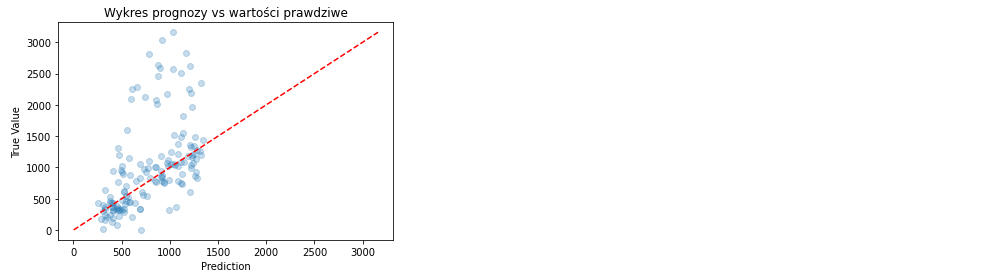

# Wykres reszt
Jak widzisz na wykresie poprzedzającym, dla wartości prawdziwej model niedoszacowuje wysokich wartości. Z pomocą przychodzi nam wykres reszt. Powinien przypominać chmurę, wtedy można uznać, że błędy wynikają z szumu w danych. Jeśli na wykresie reszt można doszukać się zależności to znaczy, że nie w pełni wyjaśniona została zmienność.

In [39]:
errors=y_predict_test-y_test
errors

584       6.579316
585      49.776161
586     128.385690
587     179.772942
588   -1048.667164
          ...     
726      78.910470
727    -319.749456
728     165.250544
729     -34.773660
730    -189.386407
Name: rentals, Length: 147, dtype: float64

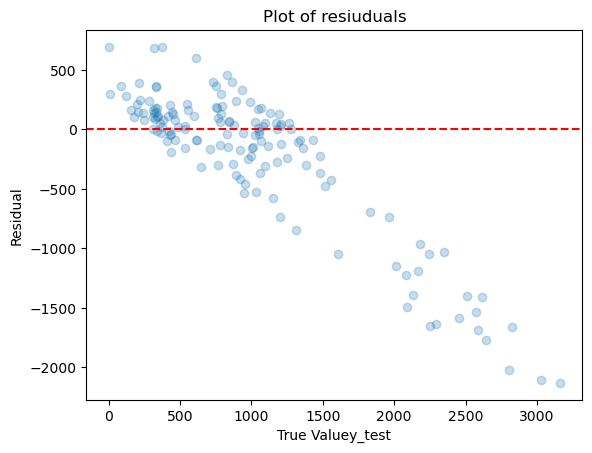

In [40]:
plt.scatter(x=y_test,y=errors,alpha=0.25)
plt.axhline(0,color='r',ls='--')
plt.xlabel('True Valuey_test')
plt.ylabel('Residual')
plt.title('Plot of resiuduals')
plt.show()

# Histogram reszt
Pokazuje czy i w jaką stronę model jest obiążony (Bias), tj. czy średnia reszt jest przesunięta względem zera (wtedy przeszacowujemy bądź niedoszacowujemy) oraz czy rozkład reszt jest np. skośny (nie w pełni wyjaśniamy wariancję).

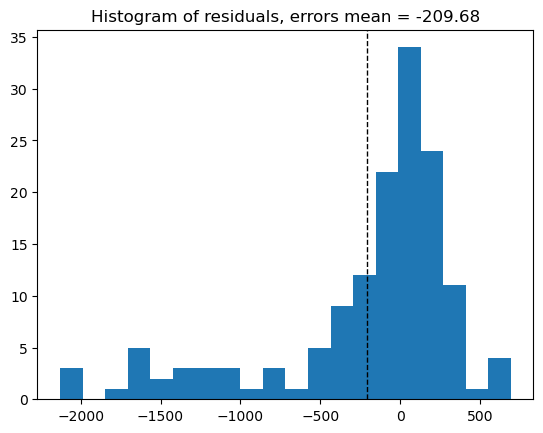

In [41]:
plt.hist(errors, bins = 20)
plt.axvline(errors.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f'Histogram of residuals, errors mean = {np.round(errors.mean(), 2)}')
plt.show()

# Regresja wielomianowa
Nie zawsze jednak zależność jest liniowa. Wraz ze wzrostem temperatury z 15°C na 25°C liczba rowerzystów będzie większa, jednak w przypadku wzrostu z 25°C na 35°C zależność może być odwrotna, nie mówiąc o jeszcze wyższych temperaturach. Korzystamy z wielomianu n-tego stopnia, czyli tworzymy nowe cechy, które są potęgą od 1 do n-tego stopnia. Następnie tworzymy regresję liniową wielu zmiennych, które stworzono na podstawie jednej – wielomian to nic innego niż inżynieria cech (Feature engineering)!

Stwórzmy regresję wielomianową w oparciu o temperaturę dla stopnia 1, 2, 3, 5, 10 oraz 20. Skorzystamy z klasy PolynomialFeatures z biblioteki sklearn, która generuje nową macierz cech składającą się ze wszystkich kombinacji cech o stopniu mniejszym lub równym podanemu stopniowi. Na ten moment korzystajmy z jednej cechy, ale jeśli nasz zbiór X miałby 2 cechy i jej postać to [a, b] to wielomian drugiego stopnia to cechy [1, a, b, a^2, ab, b^2], 1 – to wyraz wolny.

Dla każdego wielomianu wyliczymy R2 oraz RMSE dla zbioru treningowego oraz RMSE dla zbioru testowego.

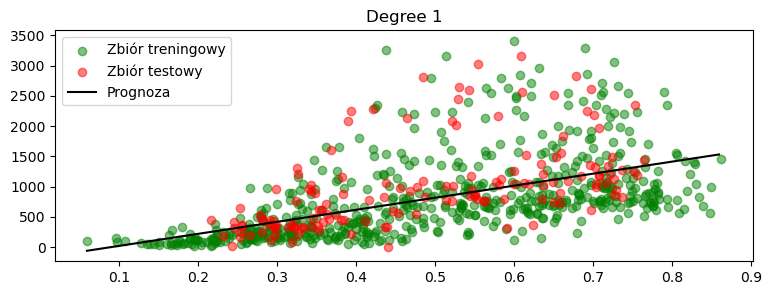

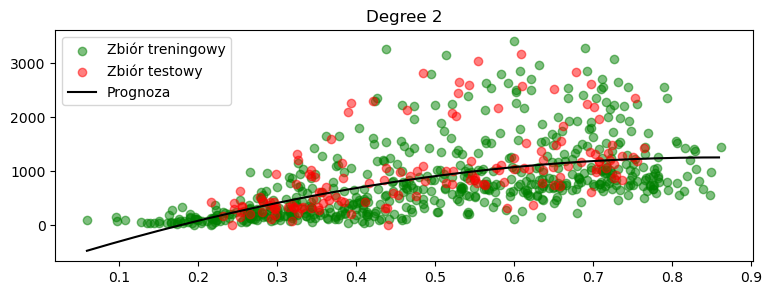

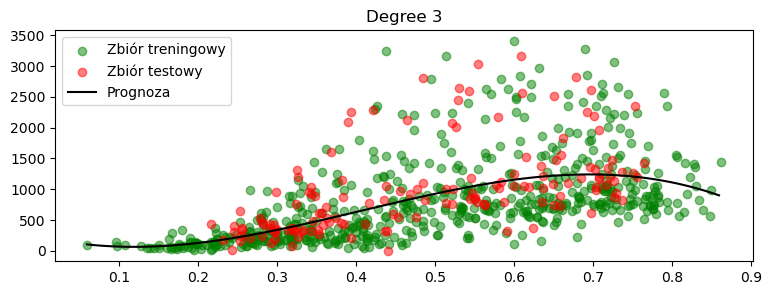

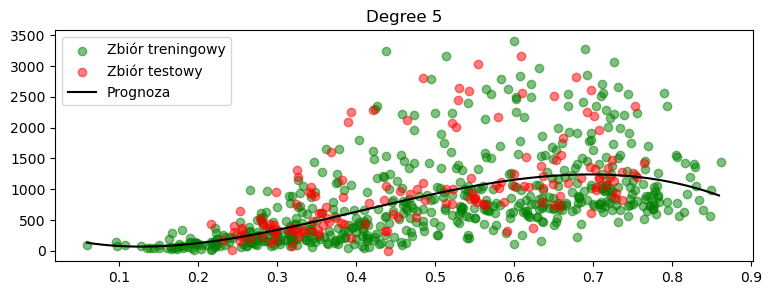

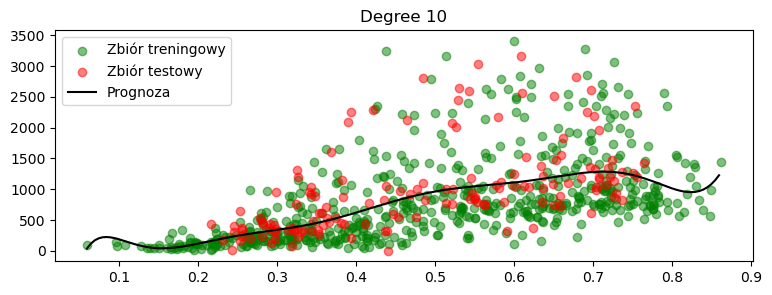

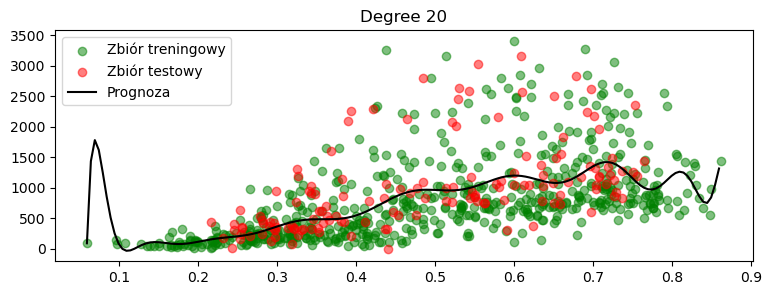

In [42]:
from sklearn.preprocessing import PolynomialFeatures

# tworzymy puste listy gdzie umieszczane będą metryki oceniające
r_2_train_list = []
rmse_train_list = []
rmse_test_list = []

# Tworzymy X, który zostanie wykorzystany dla wizualizacji naszego modelu
X_linespace = np.arange(X.min()[0], X.max()[0], step=0.005).reshape(-1, 1)
for degree in [1, 2, 3, 5, 10, 20]:

    # Transformacja naszego X
    poly_transformer = PolynomialFeatures(degree=degree,interaction_only=False)
    X_train_transformed = poly_transformer.fit_transform(X_train)

    # Trenowanie naszego modelu
    polynomial_regression = LinearRegression()
    polynomial_regression.fit(X_train_transformed, y_train)
    plt.figure(figsize=(9, 3))

    # Wizualizacja wartości ze zbioru treningowego oraz testowgo
    plt.scatter(X_train, y_train, color='green', alpha=0.5, label='Zbiór treningowy')
    plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Zbiór testowy')

    ########## Wizualizacja wielomianu ##########
    y_fitted = polynomial_regression.predict(poly_transformer.transform(X_linespace))
    plt.plot(X_linespace, y_fitted, color='black', label='Prognoza')
    plt.title(f'Degree {degree}')
    plt.legend(loc='upper left')
    plt.show()

    # Predykcja modelu na zbiorze treningowym
    prediction_train = polynomial_regression.predict(X_train_transformed)

    # Predykcja modelu na zbiorze testowym - najpierw jednak należy przekształcić zbiór testowy
    X_test_transformed = poly_transformer.transform(X_test)
    prediction_test = polynomial_regression.predict(X_test_transformed)

    # Ocena modeli
    r_2_train_list.append(r2_score(y_train, prediction_train))
    rmse_train_list.append(sqrt(mean_squared_error(y_train, prediction_train)))
    rmse_test_list.append(sqrt(mean_squared_error(y_test, prediction_test)))

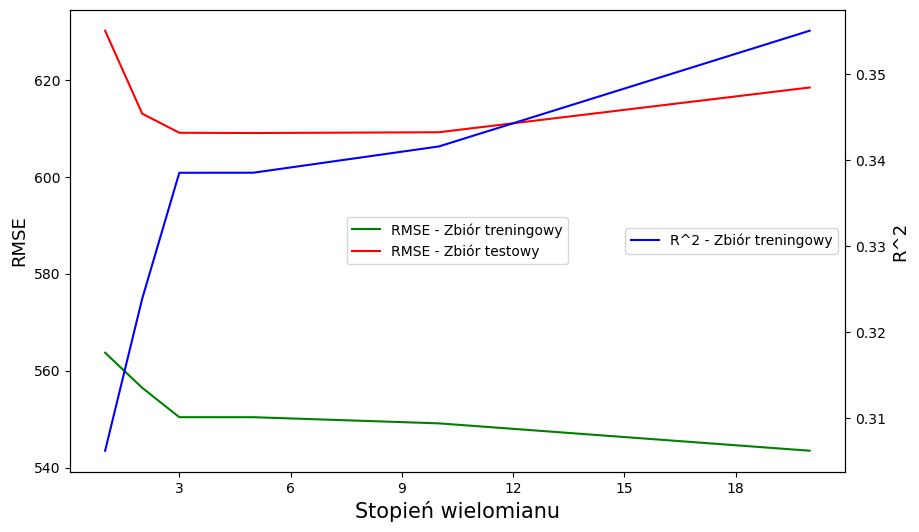

In [43]:
from matplotlib.ticker import MaxNLocator
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
ax.plot([1, 2, 3, 5, 10, 20], rmse_train_list, color='green', label='RMSE - Zbiór treningowy')
ax.plot([1, 2, 3, 5, 10, 20], rmse_test_list, color='red', label='RMSE - Zbiór testowy')
ax.legend(loc='center')
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # Ustawienie typu int dla wartości z osi X
ax.set_ylabel('RMSE', size=13)
ax.set_xlabel('Stopień wielomianu', size=15)

# Dodanie drugiej osi y dla R^2
ax2=ax.twinx()
ax2.plot([1, 2, 3, 5, 10, 20], r_2_train_list, color='blue', label='R^2 - Zbiór treningowy')
ax2.legend(loc='center right')
ax2.set_ylabel('R^2', size=13)

plt.show()

# Zbiór walidacyjny – sprawdzian krzyżowy

In [44]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=False)

# Wybór hiperparametrów

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Tworzymy Pipeline - najpierw tworzymy wielomian, następnie uczymy model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               LinearRegression())

# Nasz model sprawdzi te hiperparametry
params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5]}

# Inicjalizujemy Pipeline
polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error', # wybrane będą takie hiperparametry, które dadzą najmniejszą wartość dla tego scoringu
                                                cv=cv)

# Uczymy Grid Search, podajemy X_train - Pipeline za nas zrobi wielomian :)
polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", polynomial_regression_gridsearch.best_params_, "\n")

# Przekazujemy najlepszy estymator
polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Najlepsze hiperparametry: {'polynomialfeatures__degree': 3} 

RMSE: 609.0767802498342


# Regresja wielu zmiennych

In [46]:
# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Uczymy model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               LinearRegression())
params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5]}
polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error', # wybrane będą takie hiperparametry które dadzą najmniejszą wartość dla tego scoringu
                                                cv=cv)

polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", polynomial_regression_gridsearch.best_params_, "\n")

polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Najlepsze hiperparametry: {'polynomialfeatures__degree': 1} 

RMSE: 618.1519697010564


# Regularyzacja

In [47]:
# Importujemy regresję liniową z regularyzacją Lasso i Ridge
from sklearn.linear_model import ElasticNet

# Uczymy model
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               ElasticNet())

params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'elasticnet__alpha': [0.01,0.1,1.0,10.0],
          'elasticnet__l1_ratio': np.arange(0, 1.1, 0.1)}

polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error', # wybrane będą takie hiperparametry które dadzą najmniejszą wartość dla tego scoringu
                                                cv=cv)

polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", polynomial_regression_gridsearch.best_params_, "\n")

polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')



Najlepsze hiperparametry: {'elasticnet__alpha': 1.0, 'elasticnet__l1_ratio': 1.0, 'polynomialfeatures__degree': 5} 

RMSE: 584.8854667922695


# Wykorzystanie zmiennych kategorycznych

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features+categorical_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
numeric_transformer = Pipeline(steps=[
    ('logtransformer', PowerTransformer()),
    ('standardscaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Tworzenie końcowego Pipeline, który będziemy trenować
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', ElasticNet())])

params = {'preprocessor__num__polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'regressor__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
          'regressor__l1_ratio': np.arange(0, 1.1, 0.1)}

final_polynomial_regression_gridsearch = GridSearchCV(final_pipeline,
                                                      params,
                                                      scoring='neg_mean_squared_error',
                                                      cv=cv)

final_polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", final_polynomial_regression_gridsearch.best_params_, "\n")

final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_
predictions = final_polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Najlepsze hiperparametry: {'preprocessor__num__polynomialfeatures__degree': 1, 'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.4} 

RMSE: 483.93794140501114


# Zadanie

In [49]:
prediction_y_train = final_polynomial_regression_model.predict(X_train)
prediction_y_test=final_polynomial_regression_model.predict(X_test)

In [50]:
from sklearn.metrics import r2_score
print(f'Train R^2: {r2_score(y_train,prediction_y_train)} ')

Train R^2: 0.7010738030778285 


In [51]:
from sklearn.metrics import mean_absolute_percentage_error
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, prediction_y_train)}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test,prediction_y_test)}')

Train MAPE: 0.7443187889204681
Test MAPE: 0.8593319730028237


In [52]:
from sklearn.metrics import mean_absolute_error
print(f'Train MAE: {mean_absolute_error(y_train,prediction_y_train)}')
print(f'Test MAE: {mean_absolute_error(y_test,prediction_y_test)}')

Train MAE: 261.2984273983087
Test MAE: 348.5851935515566


In [53]:
from sklearn.metrics import mean_squared_error
print(f'Train MSE: {mean_squared_error(y_train, prediction_y_train)}')
print(f'Test MSE: {mean_squared_error(y_test, prediction_y_test)}')

Train MSE: 136897.75284013432
Test MSE: 234195.93113132


# Wykres reszt

In [54]:
errors2=prediction_y_test-y_test

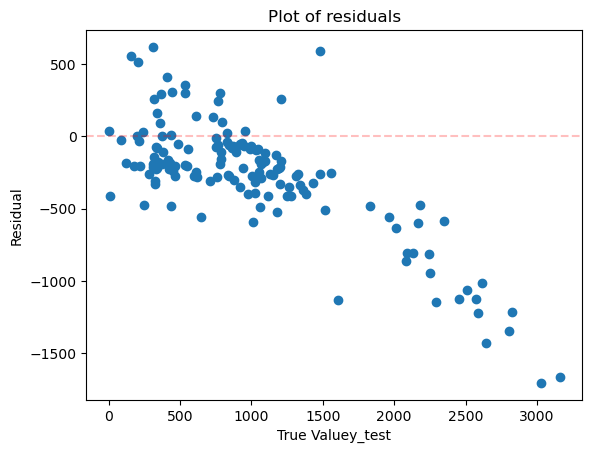

In [55]:
plt.scatter(x=y_test,y=errors2)
plt.axhline(0,color='r',ls='--',alpha=0.25)
plt.xlabel('True Valuey_test')
plt.ylabel('Residual')
plt.title(f'Plot of residuals')
plt.show()

### W wiekszosci bledy dla niskich wartosci prawdziwych  sa randomowo zlokalizowane wokol zera natomiast dla wyzszych wartosci mozna zauwazyc tworzacy sie pattern

# Histogram reszt

In [74]:
median_errors=np.median(errors2)
from scipy import stats
moda_errors=stats.mode(errors2)
print(moda_errors)


ModeResult(mode=-1705.6859194983392, count=1)


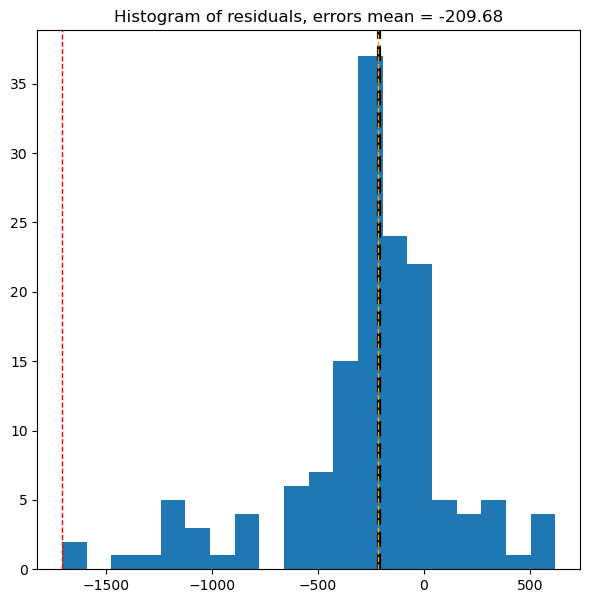

In [76]:
plt.figure(figsize=(7,7))
plt.hist(errors2, bins = 20)
plt.axvline(errors.mean(), color='black', linestyle='dashed', linewidth=3)
plt.axvline(median_errors, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(moda_errors[0], color='red', linestyle='dashed', linewidth=1)
plt.title(f'Histogram of residuals, errors mean = {np.round(errors.mean(), 2)}')
plt.show()

### Model jest rowniez niedoszacowany oraz pozytywnie skosny, jednak bardziej przyblizoy do rozkladu normalnego niz pierwszy model

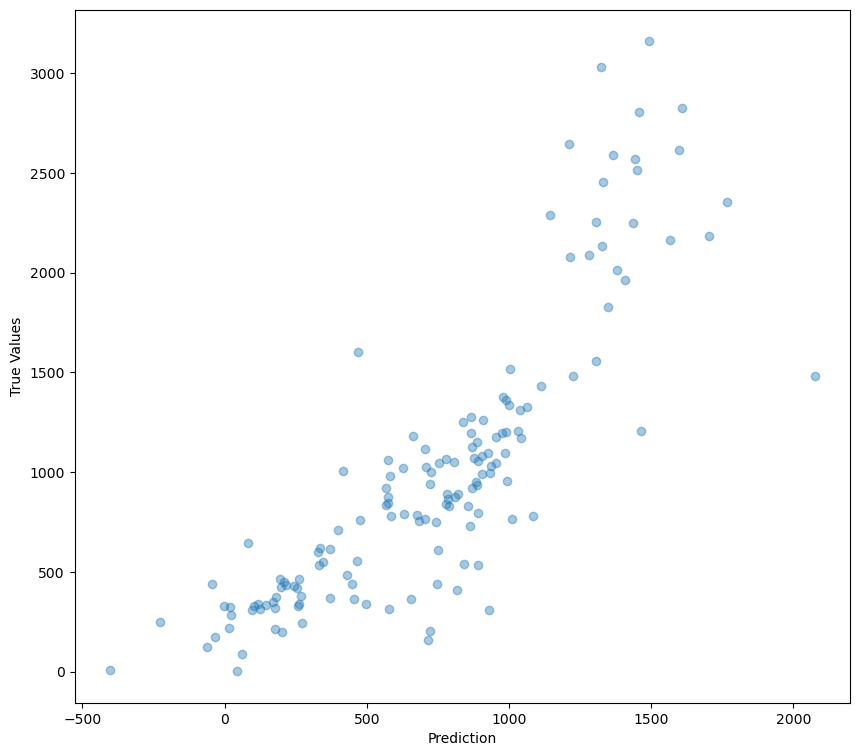

In [65]:
plt.figure(figsize=(10,9))
plt.scatter(prediction_y_test,y_test,alpha=0.4)
plt.xlabel('Prediction')
plt.ylabel('True Values')
plt.show()